<a href="https://colab.research.google.com/github/HumayDS/Digital-Data-Analytics-spring-2024-/blob/main/12_lesson_Clustering_update%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

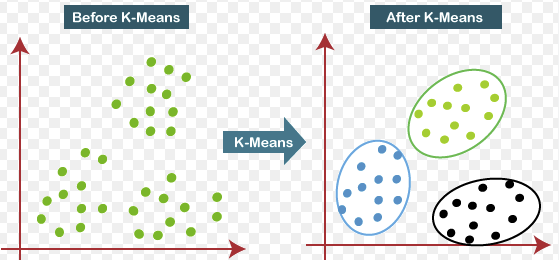

### K- Means clustering

## Automatically segment customers(Data)

### Steps :
## Step 1 : The number of clusters is determined, for example, I will divide it into 2 clusters
## Step 2 :K centers are chosen randomly (or we  select).
## Step 3 :For each observation, distances to k centers are calculated, and observations are written to the nearest k - center
## Addım 4 : This process is repeated many times, and finally the one with the least error is selected.
#NOTE: How many k should we choose? If we do not want to determine it ourselves, we will find the optimal k using certain methods

In [113]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

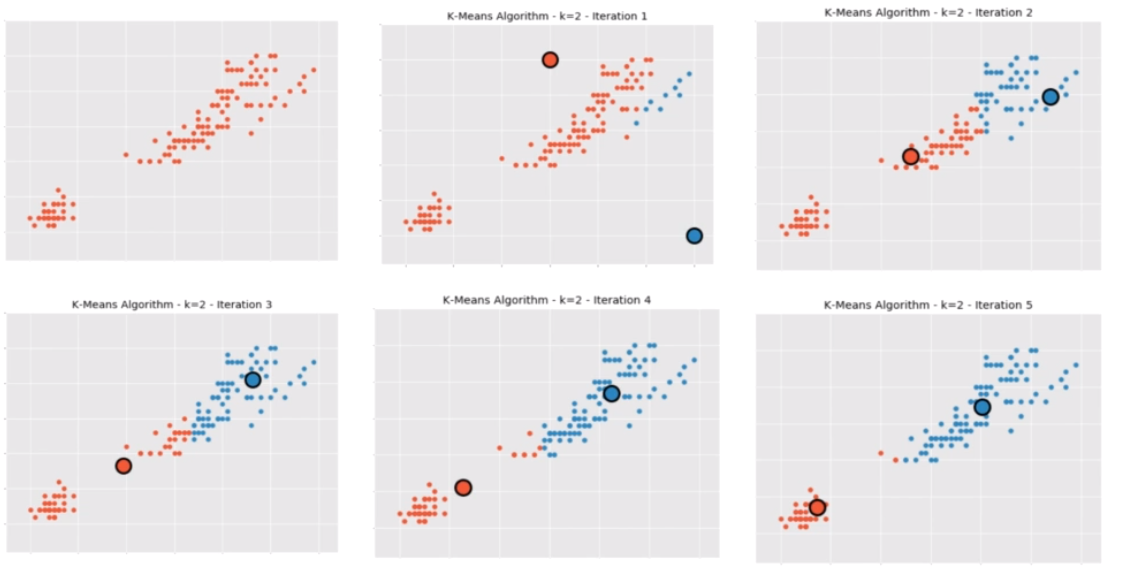

In [114]:
df =   pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [115]:
## Determine index
df.index =  df.iloc[:,0]

In [116]:
##Monitor İndex
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [117]:
##Monitor Dataset
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [118]:
#Delete irrelevant column
df = df.drop('Unnamed: 0' , axis = 1)

In [119]:
#Monitor dataset again
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [120]:
# delete index name
df.index.name = None

In [121]:
#Check na's (Should exist)
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [122]:
## Dataset is ready
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [123]:
#Check types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [124]:
#Get statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [125]:
#If needed, I can create a new modifier to add weight to any modifier
##df['murder_11'] = np.where(df['Murder'] > 11 , 1 , 0)

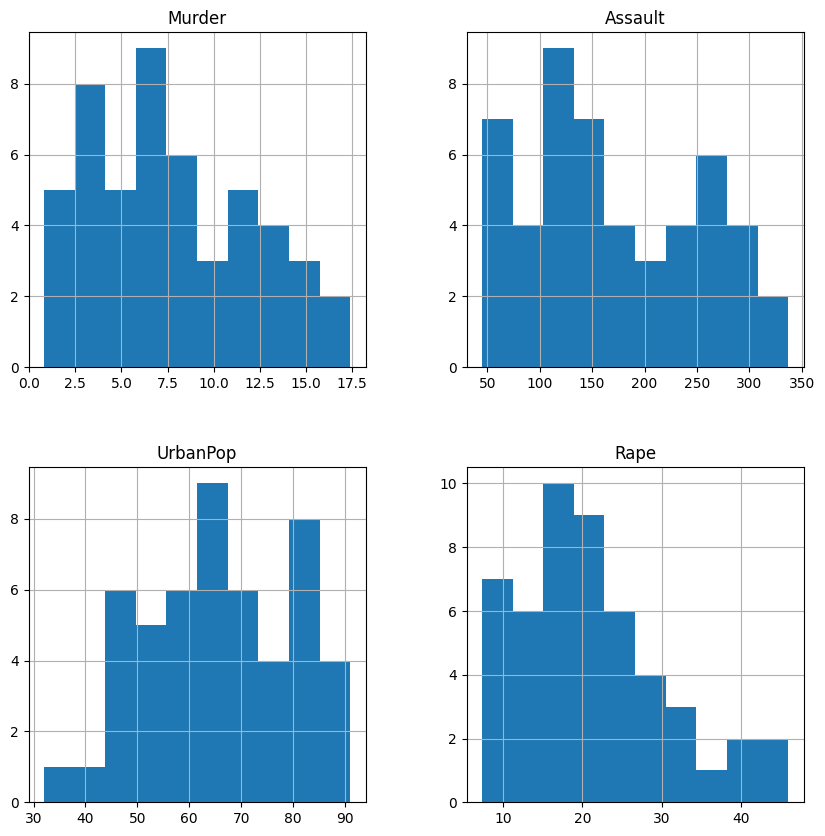

In [126]:
#Check distribution
df.hist(figsize = (10,10));

In [127]:
#Create model with 4 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4 , random_state=3425)
kmeans

KMeans(n_clusters=4, random_state=3425)

In [128]:
#fit to dataset
k_fit = kmeans.fit(df)

In [129]:
#Check number of cluster
k_fit.n_clusters

4

In [130]:
##Check clusters
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [131]:
## 2 Create 2 clusters and visualize
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

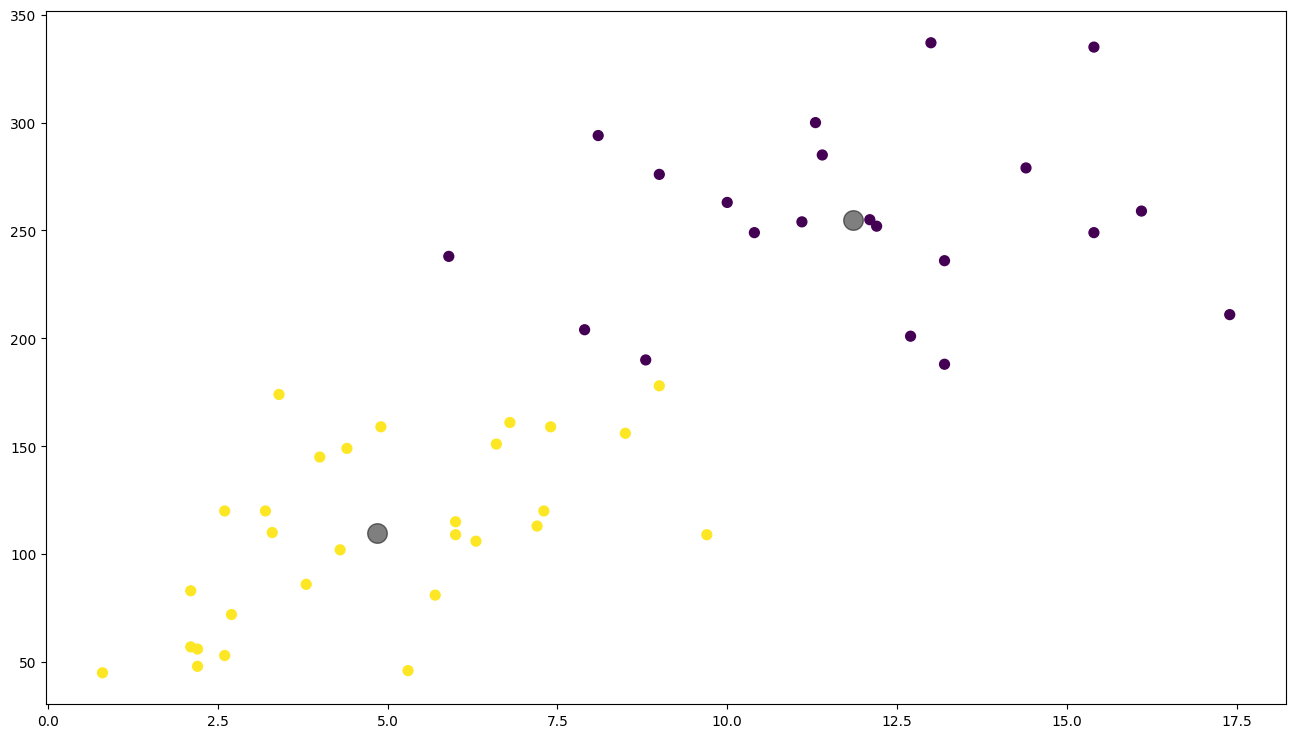

In [132]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [133]:
#!pip install --upgrade matplotlib
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [134]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = kmeans.cluster_centers_

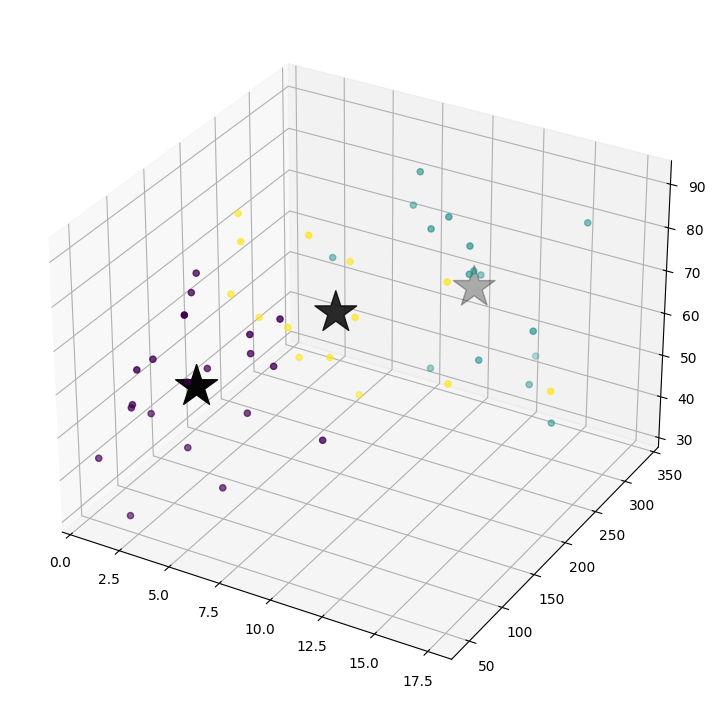

In [135]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clusters)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           marker='*',
           c='#050505',
           s=1000);

In [136]:
kmeans = KMeans(n_clusters = 2, random_state=3425)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [137]:
clusters2 = pd.DataFrame({"Shtat" : df.index, "Clusters": clusters})[0:10]
clusters2

,Shtat,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,0


In [138]:
df["clusters"] = clusters

In [139]:
df.head()

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [140]:
df["clusters"] = df['clusters'] + 1

In [141]:
df.head(20)

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1


In [142]:
cluster1 = df[df.clusters ==1 ]

In [143]:
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,21.0,11.857143,2.962528,5.9,10.0,12.1,13.2,17.4
Assault,21.0,255.000000,42.169894,188.0,236.0,254.0,279.0,337.0
UrbanPop,21.0,67.619048,14.681540,44.0,58.0,70.0,80.0,91.0
Rape,21.0,28.114286,8.900128,15.8,22.2,26.1,32.1,46.0
clusters,21.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [145]:
cluster2 = df[df.clusters ==2 ]
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,29.0,4.841379,2.349091,0.8,2.7,4.4,6.6,9.7
Assault,29.0,109.758621,41.321609,45.0,81.0,110.0,149.0,178.0
UrbanPop,29.0,64.034483,14.391175,32.0,54.0,66.0,73.0,89.0
Rape,29.0,16.248276,5.974686,7.3,11.2,16.3,20.2,29.3
clusters,29.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


###Determine optimum cluster size with elbow methpd

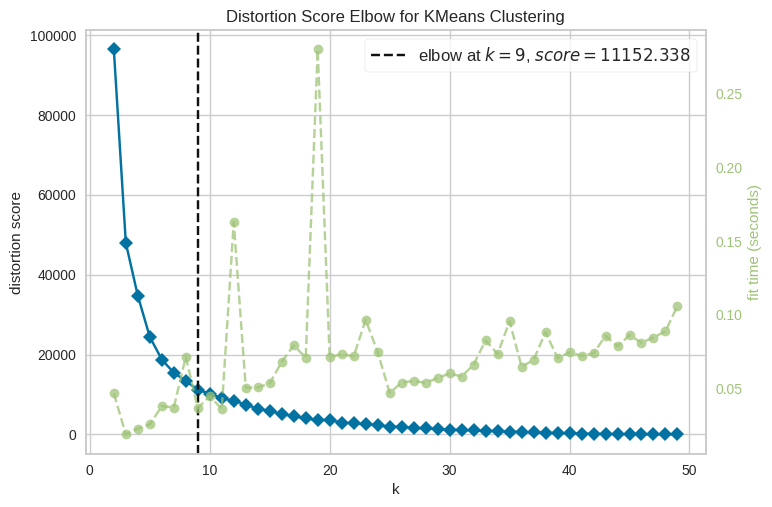

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [148]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df)
visualizer.poof()

In [149]:
df2  = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/Wholesale_customers_data.csv')

In [150]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


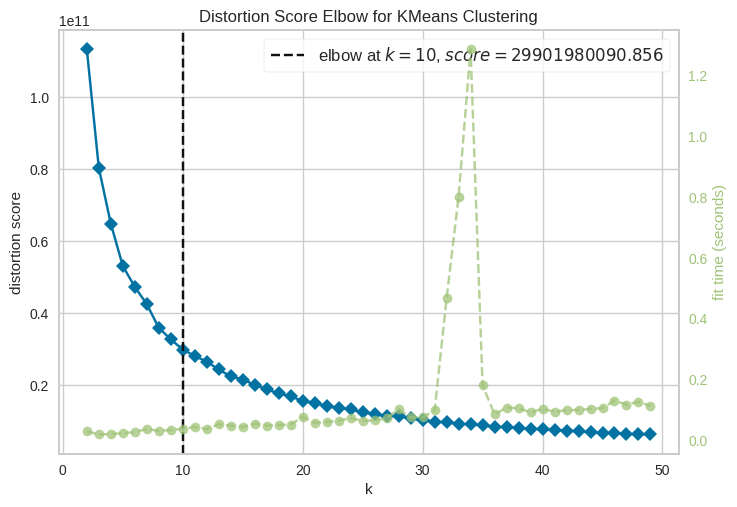

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df2)
visualizer.poof()

In [155]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
k_fit = kmeans.fit(df2)
klusterler = k_fit.labels_
klusterler

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [156]:
df2["Klusterler"] = klusterler +1

In [157]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Klusterler
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1
